In [9]:
#import drive from google
#from google.colab import drive

In [10]:
# mount the drive
#drive.mount("/content/drive")

In [11]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
  #read the data from google drive
df =pd.read_csv("cleanedtelecomunication_df.csv")
df

,BearerId,MSISDNNumber,Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,YoutubeUL_Bytes,YoutubeDL_Bytes,NetflixUL_Bytes,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes
0,1.311450e+19,3.368542e+10,243.504,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,14644405.00,17400892.0,20806551.00,599743023.0,556406594.0,43336429.0,7682779.00,3.820483e+06,318297673.0,2.710989e+06
1,1.311450e+19,3.366132e+10,236.570,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,16964908.00,19431593.0,9907089.00,798245704.0,757526492.0,40719212.0,11758420.00,1.716480e+06,290582586.0,1.025092e+07
2,1.311450e+19,3.361513e+10,231.780,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,13154981.00,7438887.0,9887128.00,192095344.0,139043208.0,53052136.0,753238.00,1.493262e+07,350039548.0,1.496782e+07
3,1.311450e+19,3.366495e+10,230.839,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,14454366.00,3334865.0,1530332.00,359872820.0,329159454.0,30713366.0,17917894.00,1.168476e+07,495376623.0,1.362536e+06
4,7.349880e+18,3.366403e+10,238.915,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,21457678.00,23039020.0,13958301.00,604428354.0,546747900.0,57680454.0,1114842.00,9.207067e+06,624397048.0,8.432981e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65566,7.277830e+18,3.365069e+10,81.230,32.0,0.0,52.0,65.0,568730.0,20949.5,526609673.0,11763428.00,16191667.0,19678161.00,631804110.0,574175259.0,57628851.0,17883703.00,1.348742e+07,3264510.0,9.197207e+06
65567,7.349880e+18,3.366345e+10,97.970,27.0,2.0,23.0,54.0,568730.0,20949.5,626893062.0,8288284.00,13877234.0,21293148.00,705783925.0,666648844.0,39135081.0,19350146.00,2.457758e+06,712180387.0,4.735033e+06
65568,1.311450e+19,3.362189e+10,98.249,43.0,6.0,43.0,47.0,568730.0,20949.5,553539484.0,1855903.00,22660510.0,5065760.00,627698629.0,592786405.0,34912224.0,9963942.00,1.131473e+07,121100856.0,1.339432e+07
65569,1.311450e+19,3.361962e+10,97.910,37.0,5.0,34.0,37.0,568730.0,20949.5,352536971.0,8305402.00,8817106.0,13172589.00,401522016.0,371895920.0,29626096.0,3322253.00,1.406930e+06,814713113.0,2.529475e+06


####These metrics can provide a comprehensive view of network usage, helping to optimize performance, allocate resources, and understand user behavior.

In [13]:
# Step 1: Identify duplicate columns
# Transpose the DataFrame to make columns as rows, then drop duplicates and transpose back
df_no_duplicates = df.T.drop_duplicates().T

# Step 2: List the dropped columns
dropped_columns = df.columns.difference(df_no_duplicates.columns)

# Update the DataFrame by dropping duplicates
df = df_no_duplicates

# Output the names of the dropped columns
print(f"Dropped columns: {list(dropped_columns)}")

Dropped columns: []


In [14]:

# Calculate Sessions Frequency by grouping by 'MSISDNNumber' and counting 'BearerId'
sessions_frequency = df.groupby('MSISDNNumber')['BearerId'].count().reset_index()

# Rename the column for clarity
sessions_frequency.columns = ['MSISDNNumber', 'session_frequency']

# Display the result
print(sessions_frequency)

       MSISDNNumber  session_frequency
0      3.360100e+10                  1
1      3.360100e+10                  1
2      3.360100e+10                  1
3      3.360101e+10                  1
4      3.360101e+10                  1
...             ...                ...
56669  3.378996e+10                  1
56670  3.378996e+10                  1
56671  3.378997e+10                  1
56672  3.378998e+10                  1
56673  3.379000e+10                  1

[56674 rows x 2 columns]


### Find top 10 customers by each engagement metric





In [15]:
# Calculate the required aggregates
aggregated_data = df.groupby('MSISDNNumber').agg(
    session_frequency=('BearerId', 'count'),
    total_duration_seconds=('Duration_Seconds', 'sum'),
    total_data=('Total_Data', 'sum')  # Assuming Total_Data is represented by Total_DL
).reset_index()

# Top 10 by session frequency
top_10_by_session_frequency = aggregated_data.nlargest(10, 'session_frequency')
print("Top 10 customers by session frequency:")
print(top_10_by_session_frequency)

# Top 10 by total duration
top_10_by_total_duration = aggregated_data.nlargest(10, 'total_duration_seconds')
print("\nTop Top10 customers by total duration:")
print(top_10_by_total_duration)

# Top 10 by total data usage
top_10_by_total_data = aggregated_data.nlargest(10, 'total_data')
print("\nTop 10 customers by total data usage:")
print(top_10_by_total_data)

Top 10 customers by session frequency:
       MSISDNNumber  session_frequency  total_duration_seconds    total_data
40847  3.367608e+10                  7                 308.977  3.296735e+09
47681  3.369966e+10                  7                 422.051  3.745484e+09
5961   3.362055e+10                  6                 511.841  2.924214e+09
22246  3.366020e+10                  6                 904.179  1.867620e+09
29995  3.366383e+10                  6                1015.882  2.206515e+09
48269  3.375049e+10                  6                1137.828  2.767896e+09
2012   3.360998e+10                  5                 471.854  1.395033e+09
11270  3.363728e+10                  5                 825.876  1.964545e+09
11354  3.363761e+10                  5                 418.627  1.391271e+09
11620  3.363883e+10                  5                 734.725  2.196610e+09

Top Top10 customers by total duration:
       MSISDNNumber  session_frequency  total_duration_seconds    total_da

Correlation Matrix:
                        session_frequency  total_duration_seconds  total_data
session_frequency                1.000000                0.658279    0.616475
total_duration_seconds           0.658279                1.000000    0.406540
total_data                       0.616475                0.406540    1.000000


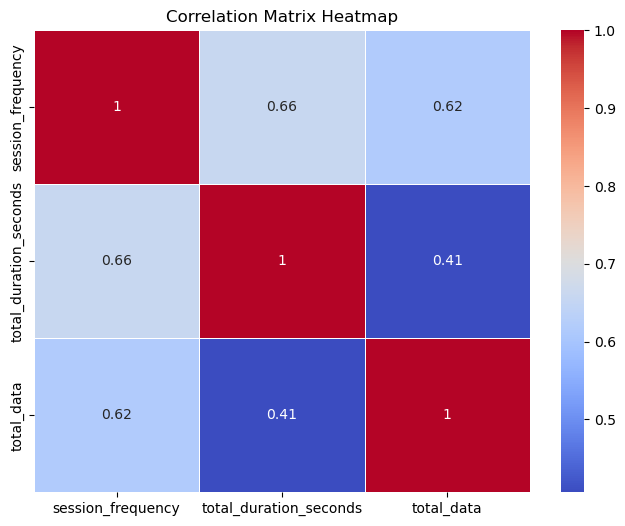

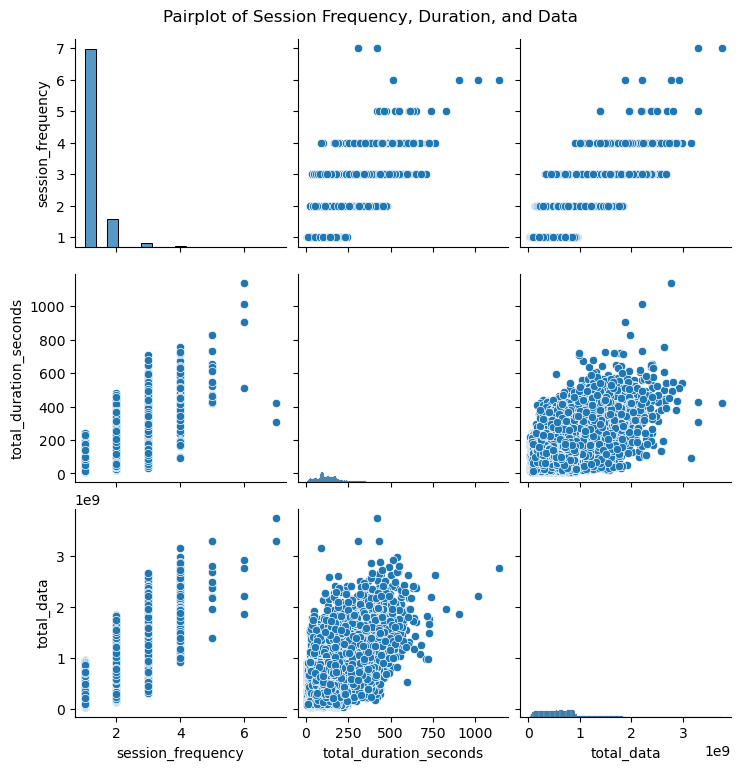

In [16]:
# Correlation Matrix
correlation_matrix = aggregated_data[['session_frequency', 'total_duration_seconds', 'total_data']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


# 1. Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = aggregated_data[['session_frequency', 'total_duration_seconds', 'total_data']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(aggregated_data[['session_frequency', 'total_duration_seconds', 'total_data']])
plt.suptitle('Pairplot of Session Frequency, Duration, and Data', y=1.02)
plt.show()


1.   The heatmap reveals strong positive correlations between session frequency, total duration, and data usage, indicating that customers who engage more frequently tend to spend more time online and consume more data.
2.   The pair chart confirms these relationships, showing clear linear trends between the variables, highlighting the predictive power of session frequency on both duration and data usage.


###Normalize the Engagement Metrics and K-Means clustering algorithm to classify customers

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

  File "c:\Users\dewan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\dewan\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


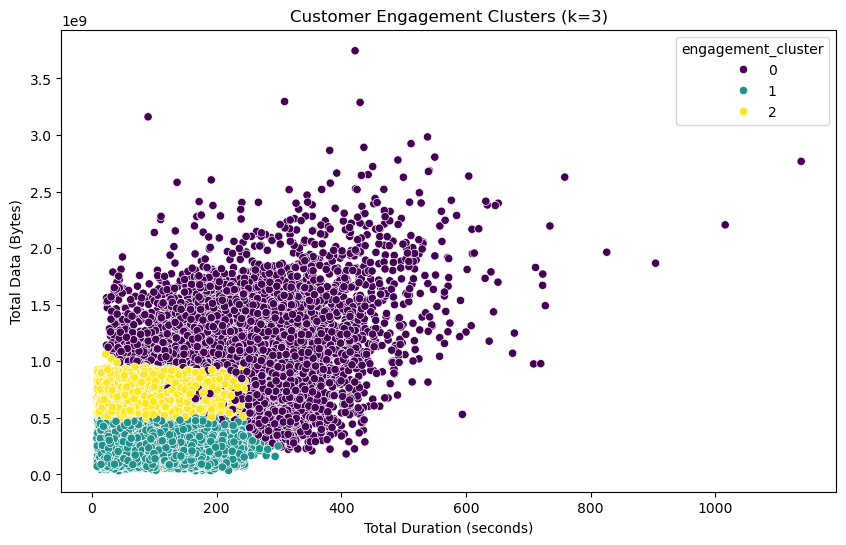

Cluster Centers (Normalized Metrics):
   session_frequency  total_duration_seconds  total_data  engagement_cluster
0           0.192481                0.219552    0.287335                   0
1           0.002151                0.093164    0.067848                   1
2           0.001532                0.091349    0.181557                   2
Clustered Data Head:


,MSISDNNumber,session_frequency,total_duration_seconds,total_data,engagement_cluster
0,3.360100e+10,1,116.720,878690574.0,2
1,3.360100e+10,1,181.230,156859643.0,1
2,3.360100e+10,1,134.969,595966483.0,2
3,3.360101e+10,1,49.878,422320698.0,1
4,3.360101e+10,1,18.549,585578364.0,2


In [18]:
# Step 2: Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data[['session_frequency', 'total_duration_seconds', 'total_data']])

# Step 3: Run K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['engagement_cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Analyze the clusters
# Add cluster centers to the DataFrame for analysis
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['session_frequency', 'total_duration_seconds', 'total_data'])
cluster_centers['engagement_cluster'] = [0, 1, 2]

# Merge cluster centers back with the original DataFrame
clustered_data = aggregated_data.merge(cluster_centers, on='engagement_cluster', suffixes=('', '_center'))

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_duration_seconds', y='total_data', hue='engagement_cluster', data=aggregated_data, palette='viridis')
plt.title('Customer Engagement Clusters (k=3)')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Total Data (Bytes)')
plt.show()

# Display the cluster centers
print("Cluster Centers (Normalized Metrics):")
print(cluster_centers)

# Display the clustered data
print("Clustered Data Head:")
aggregated_data.head()



1.   Cluster 0 (Engagement Cluster 0):
Represents the most varied group in terms of engagement.
Includes customers who could be heavy users with longer session durations and higher data consumption.

2.   Cluster 1 (Engagement Cluster 1):
Represents customers with low engagement.
They have short session durations and consume relatively little data.

3.   Cluster 2 (Engagement Cluster 2):
Likely represents customers with moderate engagement.
They consume more data than Cluster 1 but have shorter durations, possibly indicating efficient or high-speed usage.






Cluster Statistics:


,engagement_cluster,session_frequency_min,session_frequency_max,session_frequency_mean,session_frequency_sum,total_duration_seconds_min,total_duration_seconds_max,total_duration_seconds_mean,total_duration_seconds_sum,total_data_min,total_data_max,total_data_mean,total_data_sum
0,0,2,7,2.154846,15586,23.151,1137.828,255.572854,1848558.455,181398787.0,3.745484e+09,1.099794e+09,7.954808e+12
1,1,1,2,1.012895,24900,7.697,298.589,112.742075,2771538.425,33249009.0,5.016703e+08,2.846569e+08,6.997721e+12
2,2,1,2,1.009132,25085,7.426,244.900,110.687465,2751468.994,491027800.0,1.065495e+09,7.067692e+08,1.756887e+13


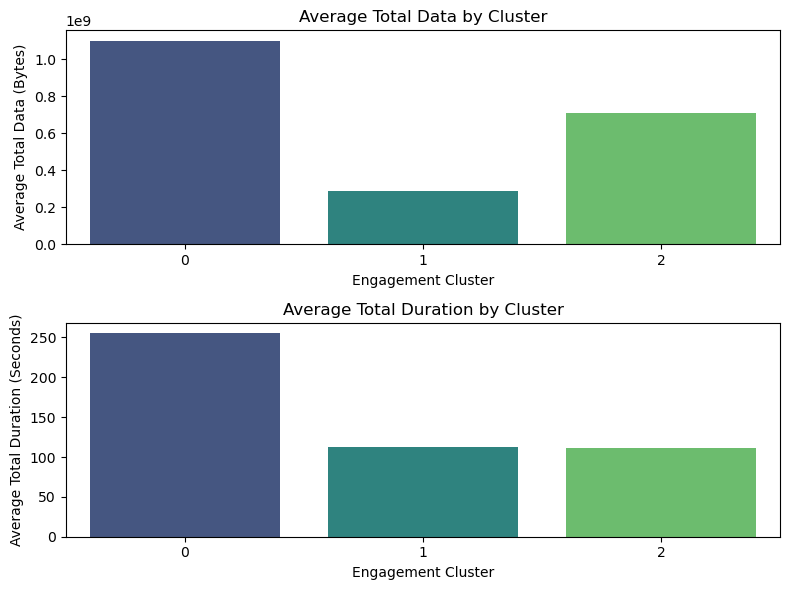

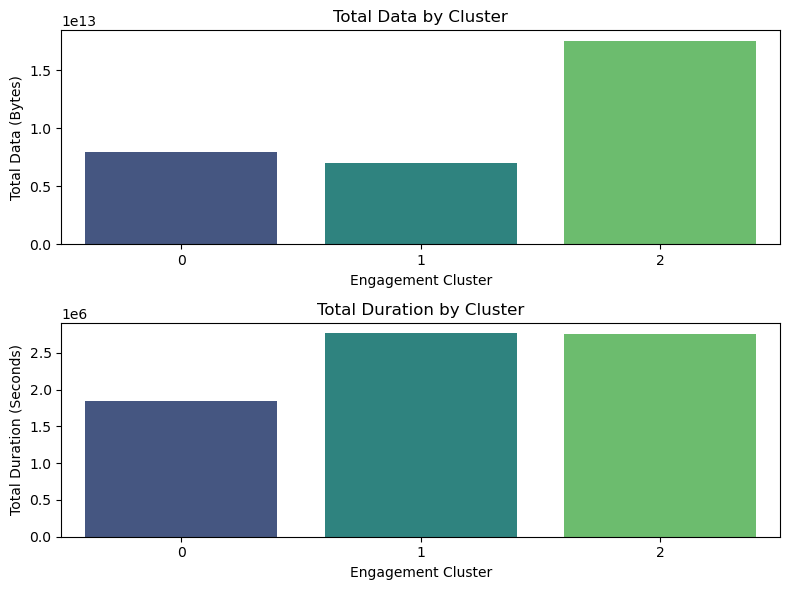

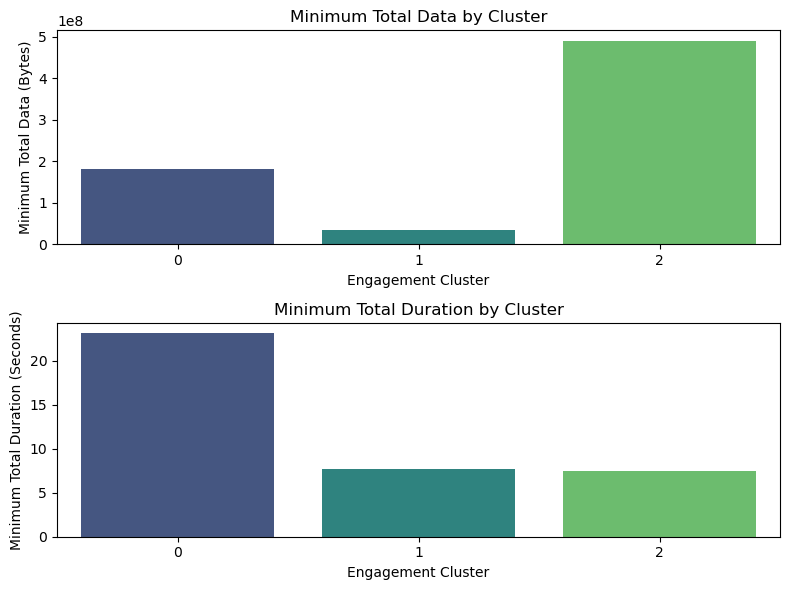

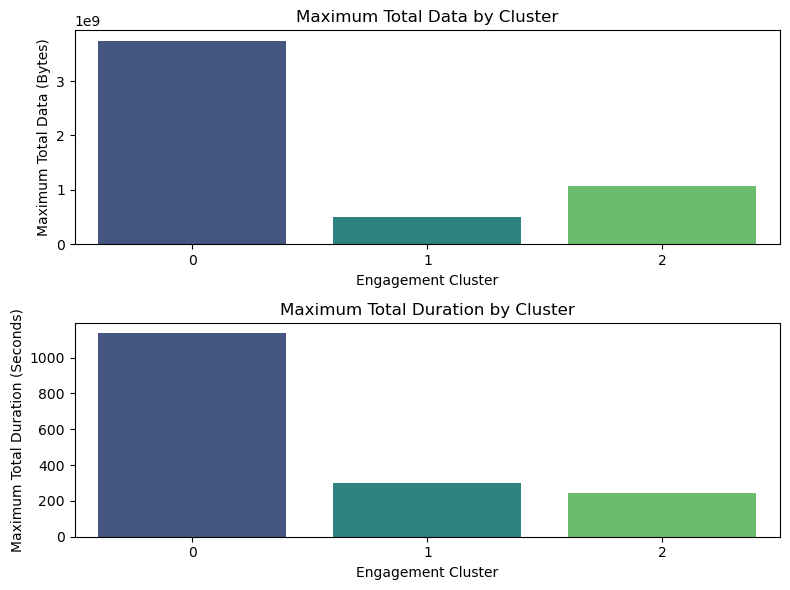

In [19]:
# Step 1: Compute the statistics for each cluster
cluster_stats = aggregated_data.groupby('engagement_cluster')[['session_frequency', 'total_duration_seconds', 'total_data']].agg(['min', 'max', 'mean', 'sum'])

# Flattening the multi-index columns
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]
cluster_stats = cluster_stats.reset_index()

# Step 2: Display the computed statistics
print("Cluster Statistics:")
display(cluster_stats)

# Step 3: Visualize the statistics

# Plot for average metrics per cluster
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='engagement_cluster', y='total_data_mean', data=cluster_stats, palette='viridis')
plt.title('Average Total Data by Cluster')
plt.ylabel('Average Total Data (Bytes)')
plt.xlabel('Engagement Cluster')

plt.subplot(2, 1, 2)
sns.barplot(x='engagement_cluster', y='total_duration_seconds_mean', data=cluster_stats, palette='viridis')
plt.title('Average Total Duration by Cluster')
plt.ylabel('Average Total Duration (Seconds)')
plt.xlabel('Engagement Cluster')

plt.tight_layout()
plt.show()

# Plot for sum (total) metrics per cluster
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='engagement_cluster', y='total_data_sum', data=cluster_stats, palette='viridis')
plt.title('Total Data by Cluster')
plt.ylabel('Total Data (Bytes)')
plt.xlabel('Engagement Cluster')

plt.subplot(2, 1, 2)
sns.barplot(x='engagement_cluster', y='total_duration_seconds_sum', data=cluster_stats, palette='viridis')
plt.title('Total Duration by Cluster')
plt.ylabel('Total Duration (Seconds)')
plt.xlabel('Engagement Cluster')

plt.tight_layout()
plt.show()

# Plot for minimum metrics per cluster
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='engagement_cluster', y='total_data_min', data=cluster_stats, palette='viridis')
plt.title('Minimum Total Data by Cluster')
plt.ylabel('Minimum Total Data (Bytes)')
plt.xlabel('Engagement Cluster')

plt.subplot(2, 1, 2)
sns.barplot(x='engagement_cluster', y='total_duration_seconds_min', data=cluster_stats, palette='viridis')
plt.title('Minimum Total Duration by Cluster')
plt.ylabel('Minimum Total Duration (Seconds)')
plt.xlabel('Engagement Cluster')

plt.tight_layout()
plt.show()

# Plot for maximum metrics per cluster
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='engagement_cluster', y='total_data_max', data=cluster_stats, palette='viridis')
plt.title('Maximum Total Data by Cluster')
plt.ylabel('Maximum Total Data (Bytes)')
plt.xlabel('Engagement Cluster')

plt.subplot(2, 1, 2)
sns.barplot(x='engagement_cluster', y='total_duration_seconds_max', data=cluster_stats, palette='viridis')
plt.title('Maximum Total Duration by Cluster')
plt.ylabel('Maximum Total Duration (Seconds)')
plt.xlabel('Engagement Cluster')

plt.tight_layout()
plt.show()

###Compute the minimum, maximum, average & total non-normalized metrics for each cluster.

       Youtube_Total  Netflix_Total  Gaming_Total   Other_Total
min     1.296550e+05   1.845690e+05  6.900380e+05  9.097210e+05
max     4.519008e+07   4.518850e+07  8.592028e+08  8.595209e+08
mean    2.261217e+07   2.256992e+07  4.306429e+08  4.285812e+08
total   1.482703e+12   1.479932e+12  2.823768e+13  2.810250e+13


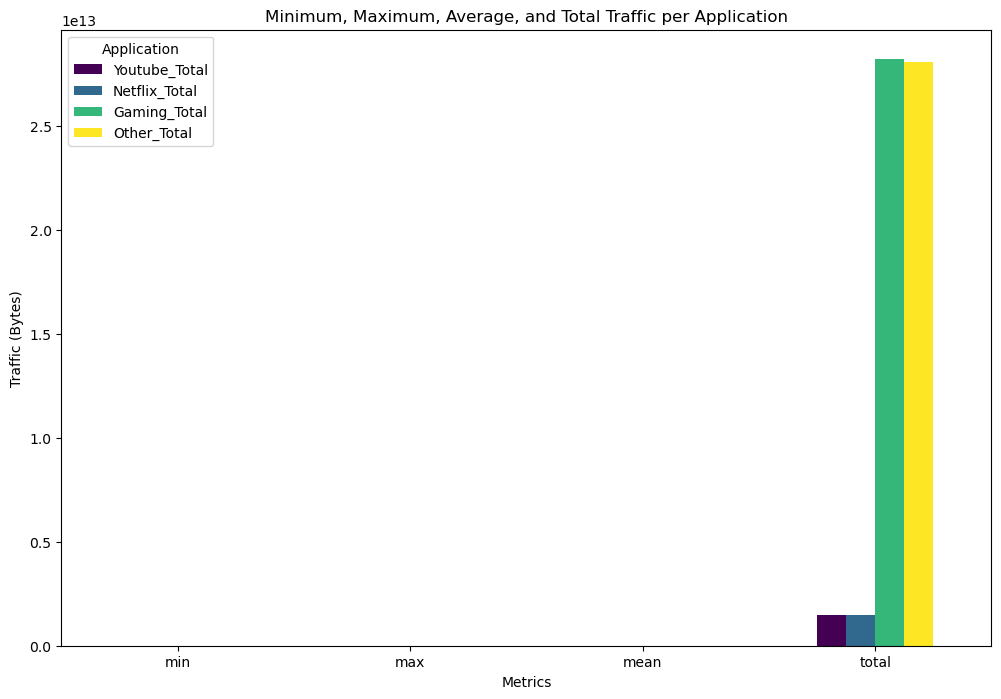

In [20]:

# Sum the download and upload traffic for each application per user
df['Youtube_Total'] = df['YoutubeDL_Bytes'] + df['YoutubeUL_Bytes']
df['Netflix_Total'] = df['NetflixDL_Bytes'] + df['NetflixUL_Bytes']
df['Gaming_Total'] = df['GamingDL_Bytes'] + df['GamingUL_Bytes']
df['Other_Total'] = df['OtherDL_Bytes'] + df['OtherUL_Bytes']

# List of total application columns
app_columns = ['Youtube_Total', 'Netflix_Total', 'Gaming_Total', 'Other_Total']

# Compute metrics for each application
metrics = {}

for app in app_columns:
    metrics[app] = {
        'min': df[app].min(),
        'max': df[app].max(),
        'mean': df[app].mean(),
        'total': df[app].sum()
    }

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

print(metrics_df)

# Plot metrics for each application
metrics_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Minimum, Maximum, Average, and Total Traffic per Application')
plt.xlabel('Metrics')
plt.ylabel('Traffic (Bytes)')
plt.xticks(rotation=0)
plt.legend(title='Application')
plt.show()

**YouTube:**
The chart shows how YouTube traffic varies among users, indicating which metric has the highest traffic. For example, the max traffic might be significantly higher than the average, indicating a few heavy users.

**Netflix:**
Similar insights can be drawn for Netflix, highlighting user engagement with this application. If the mean traffic is close to the max, it suggests consistent high usage among users.

**Gaming:**
Gaming traffic might show a different pattern, possibly with a lower average traffic compared to video streaming apps, indicating a different type of user engagement.

**Other:**
The "Other" category could reveal less traffic overall, depending on the types of applications included in this category.

####The top 10 most engaged users per application

In [21]:
# List of applications
applications = ['Gaming_Total',
                'Youtube_Total',
                'Netflix_Total', 'Other_Total', ]

# Create an empty dictionary to store top 10 users per application
top_users = {}

# Aggregate total traffic per user per application and find top 10 most engaged users
for app in applications:
    top_users = df.groupby('MSISDNNumber')[app].sum().nlargest(10)

    # Print the top 10 users in a structured table format
    print(f"\nTop 10 users for {app}:")
    print(top_users.to_string(index=True))
    print("-" * 40)



Top 10 users for Gaming_Total:
MSISDNNumber
3.369966e+10    3.261549e+09
3.368091e+10    2.952551e+09
3.376372e+10    2.896136e+09
3.367608e+10    2.781394e+09
3.361711e+10    2.684287e+09
3.362112e+10    2.655355e+09
3.366720e+10    2.597633e+09
3.364776e+10    2.546264e+09
3.362055e+10    2.526292e+09
3.378283e+10    2.478751e+09
----------------------------------------

Top 10 users for Youtube_Total:
MSISDNNumber
3.367608e+10    178634466.0
3.369966e+10    176066213.0
3.366020e+10    158492814.0
3.366971e+10    140529764.0
3.365895e+10    137362299.0
3.368717e+10    134330458.0
3.366005e+10    133246314.0
3.376095e+10    133042653.0
3.360984e+10    132346685.0
3.365938e+10    130616721.0
----------------------------------------

Top 10 users for Netflix_Total:
MSISDNNumber
3.366020e+10    175856620.0
3.369966e+10    160254681.0
3.362055e+10    155668535.0
3.376095e+10    152585180.0
3.367608e+10    146859933.0
3.366173e+10    135865884.0
3.368091e+10    134569970.0
3.366383e+10   

#### The top 3 most used applications

In [22]:
# List of applications
applications = ['Gaming_Total',
                'Youtube_Total',
                'Netflix_Total', 'Other_Total',]

# Calculate the total traffic for each application
total_traffic = df[applications].sum()

# Identify the top 3 most used applications
top_3_apps = total_traffic.nlargest(3)
top_3_apps_names = top_3_apps.index.tolist()

# Print the top 3 most used applications
print("Top 3 most used applications:")
for app in top_3_apps_names:
    print(f"{app}: {top_3_apps[app]}")


Top 3 most used applications:
Gaming_Total: 28237682336946.71
Other_Total: 28102499908020.625
Youtube_Total: 1482702680702.63


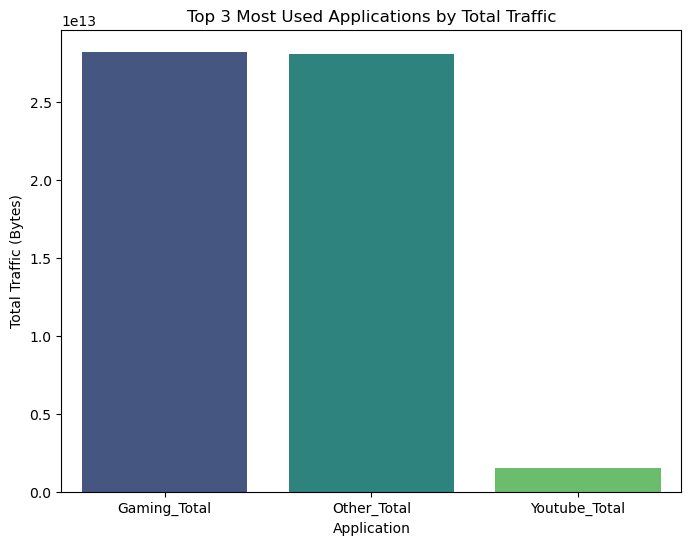

In [23]:
# Plot a bar chart for the top 3 applications
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values, palette='viridis')
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

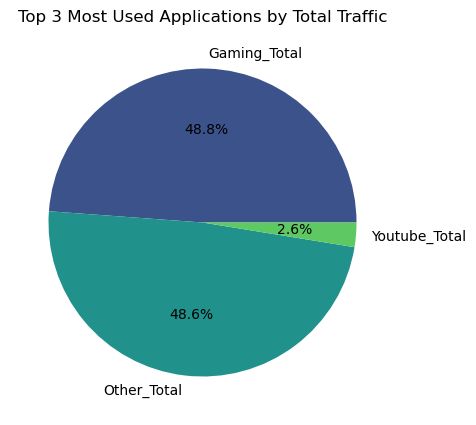

In [24]:
# Plot a pie chart for the top 3 applications
plt.figure(figsize=(5, 5))
plt.pie(top_3_apps, labels=top_3_apps.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', 3))
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.show()



1.   The high traffic for Gaming_Total and Other_Total suggests that users spend more time or consume more data on gaming and unspecified other activities than they do on YouTube.
2.    The significantly lower traffic for Youtube_Total implies that, although it's one of the top 3 applications, it still lags far behind in data consumption compared to the other two.


###Optimal value of k useing the elbow method

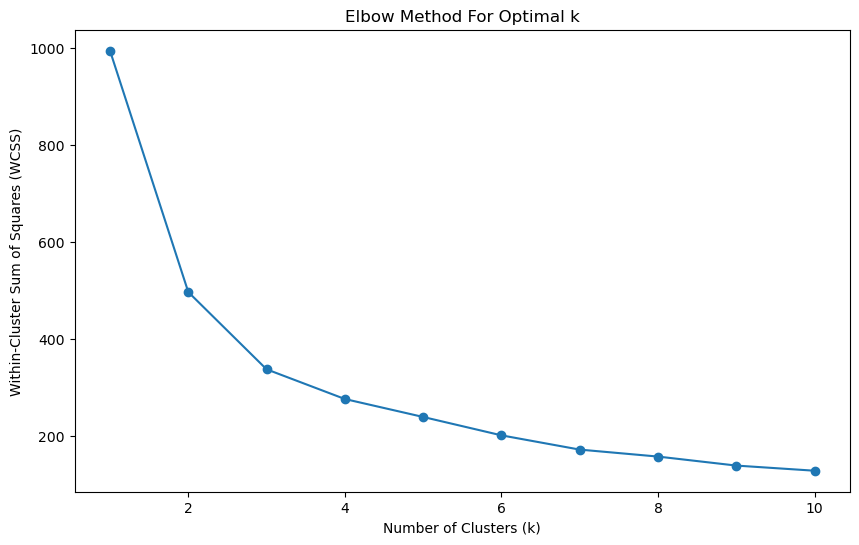

In [25]:
# Assuming aggregated_data is your DataFrame with engagement metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data[['session_frequency', 'total_duration_seconds', 'total_data']])

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**Optimal k:** In your plot, the elbow appears to occur at k=3. This suggests that 3 clusters might be an optimal choice because increasing k beyond 3 results in smaller gains in reducing WCSS.

**At k=3,** there's a noticeable drop in WCSS, indicating that the clusters are well-formed and compact. Beyond k=3, the reduction in WCSS becomes less significant, meaning additional clusters aren't contributing as much to the overall clustering quality.

Based on the Elbow Method, k=3 is likely the best choice for the number of clusters in dataset.